In [1]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\LENOVO T480\Documents\digits\train.csv')

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


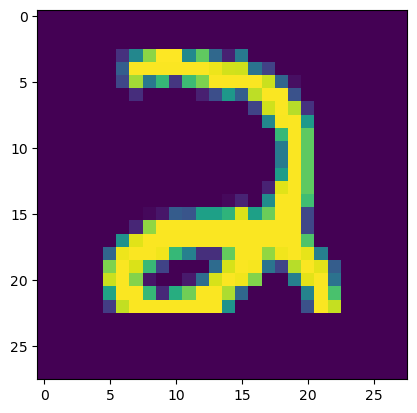

In [11]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[4728,1:].values.reshape(28,28))

In [30]:
x = df.iloc[:,1:]
y = df.label

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [32]:
x_train.shape

(33600, 784)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

17.321101903915405


In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)*100
score

96.48809523809524

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)

In [37]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [39]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [40]:
new_pred = knn.predict(x_test_trf)

In [41]:
score = accuracy_score(new_pred,y_test)*100
score

95.41666666666667